In [4]:
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:

def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


def scaled(img, scale): # returns new scale value
    img_shape_x, img_shape_y, channels = img.shape
    if img_shape_x > scale:
        return scale / img_shape_x
    else:
        return 1
    

def color_filter(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask


In [18]:
#img_folder = "test_imgs/"
img_folder = "../images/_vid2imgs/"

img_base_name = "jon_gate_20_"
img_num = "2" # 18, 24, 35, 36, 37, 54, 63, 64

img_path = img_folder + img_base_name + img_num + ".jpg"

img = cv2.imread(img_path)

img.shape

(480, 744, 3)

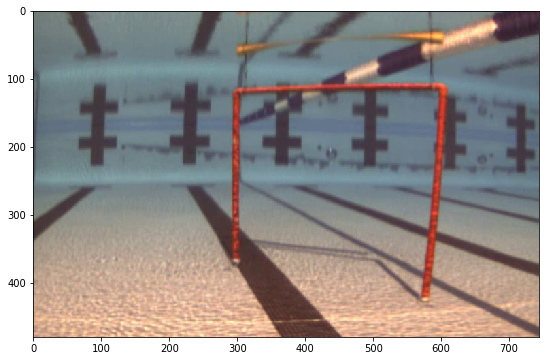

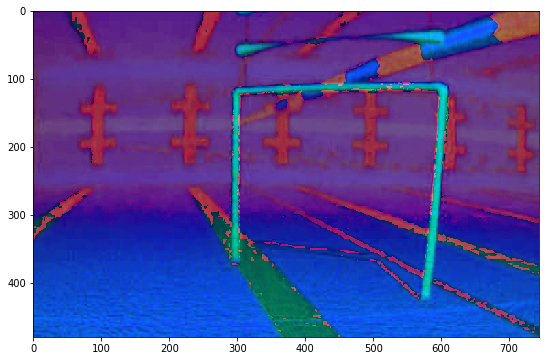

In [60]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV) )
plt.show()

In [20]:
## RGB
#lower_thresh = np.array([0, 0, 0])
#upper_thresh = np.array([100, 255, 255])

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [57]:
## HSV
lower_thresh = np.array([0, 120, 50])
upper_thresh = np.array([10, 255, 255])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [58]:
#img_color_filt, mask = color_filter(img, [lower_thresh, upper_thresh] )
img_color_filt, mask = color_filter(img_hsv, [lower_thresh, upper_thresh] )

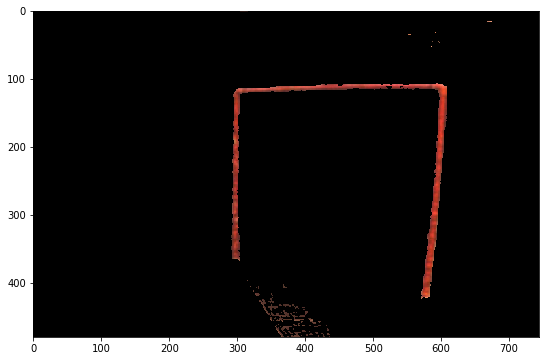

In [56]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2RGB) )
plt.show()

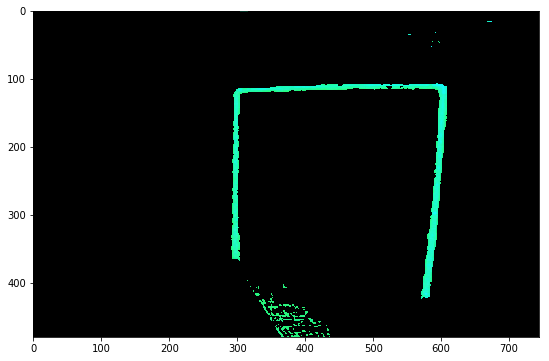

In [61]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_BGR2HSV) )
plt.show()

## Morphs before thresholding

*kernel*

In [62]:
kernel = np.ones((5, 5), np.uint8)

*erode - fade/trim*

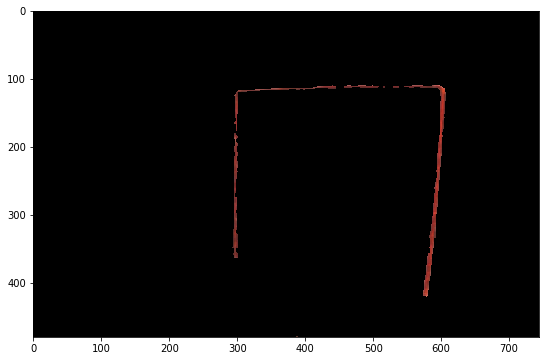

In [70]:
erode_morph = cv2.erode(img_color_filt, kernel, iterations=1)

plt.figure(figsize=(10, 6) )
#plt.imshow(erode_morph, cmap="gray")
plt.imshow(cv2.cvtColor(erode_morph, cv2.COLOR_HSV2RGB) )
plt.show()

*open - remove specs*

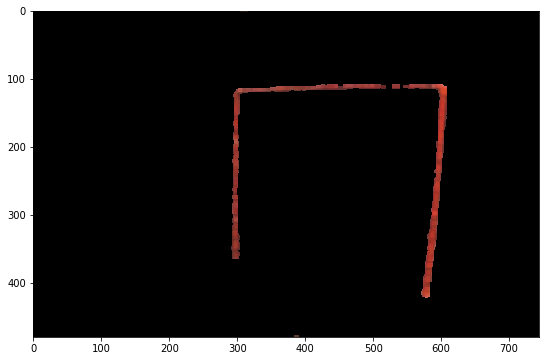

In [71]:
open_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10, 6) )
#plt.imshow(open_morph, cmap="gray")
plt.imshow(cv2.cvtColor(open_morph, cv2.COLOR_HSV2RGB) )
plt.show()

*closing - fill in*

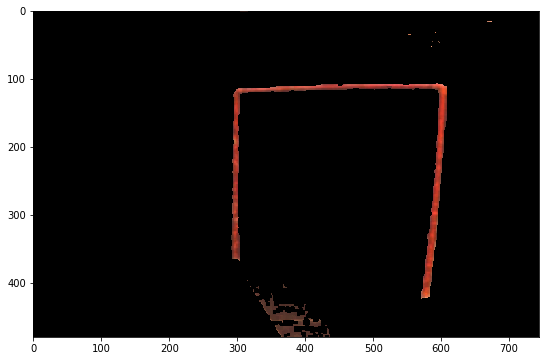

In [72]:
close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 6) )
#plt.imshow(close_morph, cmap="gray")
plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

*dilation - make chubby*

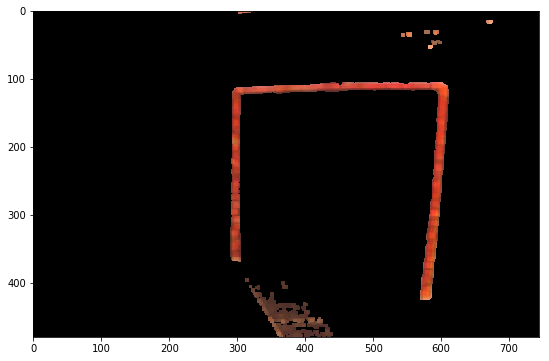

In [73]:
dilate_morph = cv2.dilate(img_color_filt, kernel, iterations=1)

plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()